In [1]:
# employees: age, years of exp, education level, salary, promotion

In [2]:
import numpy as np
import pandas as pd

# set random seed
np.random.seed(3)

# create a dataset
n_samples = 1000

#age, random between 25 to 60
age = np.random.randint(25, 61, n_samples)

# years of experience: correlated with age but with some random noise 
experience = age - 18 + np.random.normal(0, 3, n_samples)

# education level : 0 high school, 1 bach, 2 masters, 3 PhD
education = np.random.choice([0, 1, 2, 3], n_samples, p = [0.2, 0.5, 0.25, 0.05])

# salary : based onexp & eductaion, with some noise 
salary = 30000 + (experience * 2000) + (education * 10000) + np.random.normal(0, 10000, n_samples)

# promotion binary variable
promotion = (salary > 70000) & (education > 1) & (experience > 10)
promotion = promotion.astype(int)

# create a dataframe
data = pd.DataFrame( {
    'Age' : age, 
    'Experience': experience, 
    'Education' : education, 
    'Salary' : salary, 
    'Promotion' : promotion
})

# display the first few rows
data.head()

,Age,Experience,Education,Salary,Promotion
0,49,29.517951,2,103354.262432,1
1,28,7.306730,1,57456.178733,0
2,33,13.444081,1,58920.629222,0
3,25,2.328886,2,49354.836538,0
4,46,34.235286,1,115747.413730,0


In [3]:
# linear regression 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# define features and target
# X input, y output
X = data[['Experience', 'Education']]
y = data['Salary']

In [6]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40) 

In [7]:
# create and train the linear regresssion model 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
# predict on the test data 
y_pred = lin_reg.predict(X_test)

In [9]:
# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse}")
print(f"R-squared : {r2}")

MSE = 89338122.90228574
R-squared : 0.8479603962050799


In [10]:
predicted_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})

predicted_df.head(10)

,Actual,Predicted
204,93737.355402,89464.737738
71,78622.114195,89292.324674
594,111901.597193,121299.818057
672,80170.839130,77897.159249
14,83768.822792,86329.088209
64,109513.048749,116232.876612
340,114761.360830,116793.302442
135,104653.305138,116348.172620
350,64091.109342,61478.463368
976,115355.397568,108144.737874


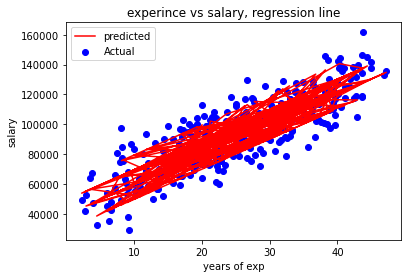

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_test['Experience'], y_test, color = 'blue', label = 'Actual')
plt.plot(X_test['Experience'], y_pred, color = 'red', label = 'predicted')
plt.xlabel("years of exp")
plt.ylabel('salary')
plt.title('experince vs salary, regression line')
plt.legend()
plt.show()

In [12]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [14]:
# define features and target
# X input, y output
X = data[['Experience', 'Education']]
y = data['Promotion']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 30) 

# create & train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# predict on the test data
y_pred = log_reg.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# display the results 
print(f"accuracy = {accuracy}")
print(f"precision = {precision}" )
print(f"recall = {recall}")

predicted_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})

predicted_df.head(10)

accuracy = 0.9766666666666667
precision = 0.9655172413793104
recall = 0.9545454545454546


,Actual,Predicted
923,1,1
921,1,1
516,1,1
87,0,0
879,1,1
463,0,0
112,0,0
297,0,0
417,0,0
658,0,0


In [16]:
mismatch_df = predicted_df[predicted_df['Actual'] != predicted_df['Predicted']]

print(f"\n num of mismatched = {len(mismatch_df)}\n\n")
mismatch_df


 num of mismatched = 7




,Actual,Predicted
373,0,1
939,1,0
274,1,0
288,0,1
930,1,0
307,0,1
847,1,0
